In [1]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from pca import pca
import seaborn as sns

In [3]:
pdata = pd.read_csv('/Users/csb/Desktop/part_diffExpr_P0.05_C2.matrix.txt',sep='\t',index_col=0) # 파일 불러오기
pdata

,D3B1,D3B2,D3B3,D3B4,D3L1,D3L2,D3L3,D3L4,D3S1,D4B1,D4B2,D4B3,D4B4,D4L1,D4L2,D4L3,D4L4,D4S1
Name,,,,,,,,,,,,,,,,,,
TRINITY_DN189151_c7_g1_i2,1.54,0.00,0.00,0.87,0.43,0.72,0.00,0.00,0.68,2.31,2.32,0.24,0.00,1.02,0.88,0.00,0.00,1.61
TRINITY_DN187839_c1_g7_i3,0.00,0.00,0.00,0.00,0.18,0.00,0.00,0.00,1.04,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95
TRINITY_DN182945_c3_g3_i6,0.57,0.59,0.00,0.00,0.97,0.97,0.00,0.00,0.30,3.43,0.00,1.31,0.00,2.09,0.26,1.33,0.52,1.03
TRINITY_DN167660_c0_g1_i1,1.96,0.00,0.00,0.00,2.15,0.28,1.19,0.00,1.32,0.33,0.90,0.56,0.00,2.19,0.23,2.75,0.00,2.50
TRINITY_DN182743_c0_g1_i4,0.00,3.93,6.30,0.00,0.87,5.10,1.68,2.36,0.23,0.11,8.11,1.28,0.76,3.04,7.58,2.11,3.19,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN155667_c1_g2_i2,6.92,13.99,7.19,1.30,17.08,20.22,27.79,7.99,7.06,8.74,7.06,6.22,10.55,9.60,16.15,12.14,21.58,3.30
TRINITY_DN176676_c2_g3_i2,2.12,0.73,0.34,1.46,0.50,0.40,0.38,0.00,2.93,1.93,0.65,1.56,0.59,0.75,0.49,0.38,0.32,1.01
TRINITY_DN268218_c0_g1_i1,0.00,0.00,0.00,0.00,6.35,8.91,5.92,3.93,0.00,0.00,0.00,0.00,0.00,3.69,3.36,4.54,14.33,0.00


In [4]:
tdata=pdata.T
tdata

Name,TRINITY_DN9541_c0_g1_i1,TRINITY_DN23146_c7_g1_i2,TRINITY_DN12009_c0_g1_i2,TRINITY_DN11413_c0_g1_i8,TRINITY_DN57793_c0_g1_i6,TRINITY_DN70038_c1_g1_i8,TRINITY_DN172600_c0_g2_i1,TRINITY_DN110992_c0_g1_i1,TRINITY_DN4014_c0_g1_i1,TRINITY_DN3079_c0_g2_i1,...,TRINITY_DN4600_c0_g1_i5,TRINITY_DN73780_c0_g1_i2,TRINITY_DN9399_c0_g1_i14,TRINITY_DN4301_c0_g2_i3,TRINITY_DN85171_c0_g1_i1,TRINITY_DN145_c0_g1_i22,TRINITY_DN112239_c0_g1_i1,TRINITY_DN6990_c0_g1_i6,TRINITY_DN237605_c0_g1_i1,TRINITY_DN12755_c0_g1_i2
3B1,0.13,0.00,1.16,0.42,0.00,0.81,0.00,0.00,0.00,1.61,...,2.72,1.76,0.00,4.18,0.35,0.48,0.37,0.00,0.21,0.68
3B2,0.56,0.00,0.62,0.00,0.00,2.77,0.00,0.86,0.40,0.42,...,0.74,0.29,0.00,0.60,0.00,0.00,0.00,0.92,0.00,0.00
3B3,0.00,0.00,3.33,0.00,0.00,1.26,0.00,0.00,0.15,0.55,...,2.39,0.13,0.00,1.28,0.00,0.00,0.00,1.90,0.00,0.00
3B4,0.00,0.00,5.47,0.00,0.00,0.16,0.00,0.90,0.00,0.23,...,1.35,1.79,0.00,0.77,0.00,0.00,0.00,2.17,0.00,2.61
3L1,0.20,0.22,11.12,0.00,0.16,0.47,0.00,0.13,0.36,1.23,...,10.28,0.56,0.01,0.13,0.00,1.18,0.00,0.19,0.00,0.00
3L2,0.00,0.00,14.66,0.00,0.00,1.59,0.00,0.00,0.00,1.67,...,4.54,0.09,0.00,0.06,0.23,0.00,0.00,2.76,0.00,0.00
3L3,0.00,0.00,37.63,0.48,0.00,0.26,0.00,0.00,0.54,0.34,...,2.90,0.30,0.03,0.13,0.00,0.24,0.00,1.50,0.00,0.00
3L4,0.00,0.00,9.02,0.00,0.00,0.28,0.00,0.00,0.00,1.02,...,8.16,0.32,0.00,0.34,0.00,0.00,0.00,2.32,0.00,0.00
3S1,0.31,0.00,1.32,0.45,0.05,0.65,0.00,0.09,0.12,0.12,...,3.10,0.50,0.16,0.28,0.00,0.71,0.00,0.00,0.00,1.26
4B1,0.07,0.46,0.97,0.65,0.28,1.05,0.00,0.20,0.25,1.29,...,1.55,1.96,0.00,5.80,0.00,0.48,0.00,0.49,0.15,0.87


In [5]:
pca1 = PCA(n_components=18)
pca_fit1 = pca1.fit(tdata)
pca_pred1 = pd.DataFrame(pca1.fit_transform(tdata), index=tdata.index, columns=[f"pca{num+1}" for num in range(tdata.shape[0])])
pca_pred1

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18
3B1,-172387.523540,-24853.227906,11291.396456,-2148.106638,-1610.738549,-665.136744,784.446783,458.157693,-229.385514,612.048527,1185.474850,-19.649288,-148.904678,-315.876329,-49.415493,171.368949,-467.699641,1.127518e-10
3B2,240252.350409,-18518.167333,-14545.534189,-254.818581,-2104.048896,-1354.380551,-670.542850,174.317759,2345.503455,449.385111,-91.827681,222.694845,-74.276317,-299.941707,-62.462969,72.501433,-7.395659,1.127518e-10
3B3,181307.547385,-16664.258466,21245.392810,-33.687333,-1299.470172,3126.533435,-2268.046099,-280.145470,-413.391468,-531.892552,-44.077601,58.356053,-16.515284,-626.120087,2.842930,94.268471,50.739511,1.127518e-10
3B4,386229.960384,-18674.248673,-13294.750396,-1963.731999,-921.252242,2368.071479,2742.438074,266.587144,-842.728345,101.526153,-97.735585,-94.810960,165.954582,-79.323544,5.240691,-31.339066,12.990489,1.127518e-10
3L1,-173228.126445,6415.579980,-1769.010595,-93.576331,2888.676516,2316.335450,495.706564,-180.949159,727.244216,184.785543,74.820763,-138.326256,-97.212869,188.683542,541.823333,647.310161,143.887607,1.127518e-10
3L2,-18737.096509,34585.816346,3496.467091,10672.413625,-1933.856860,-102.310375,962.445471,169.297537,-124.042685,-433.723397,10.587467,714.562407,-631.140305,124.552825,-79.368824,60.402367,2.017511,1.127518e-10
3L3,-128613.169276,-13587.008935,-4070.717671,589.243616,1336.840606,1289.706936,-235.389826,-2117.385199,-212.349723,1289.327194,-621.286068,-182.435094,-661.540472,-50.099167,-210.476765,-303.539585,-33.904228,1.127518e-10
3L4,29325.503150,152389.812052,4882.642305,-4627.092800,-1743.223812,-348.943199,138.972950,-1035.483059,155.182637,-120.488130,90.346025,-45.619415,166.655429,108.380743,-2.878786,-46.668734,-20.158638,1.127518e-10
3S1,-173555.484581,-24911.881286,896.566968,-2153.240826,-1498.965935,-642.771856,299.982112,340.368339,37.306943,-446.895639,-709.776769,378.120724,8.954722,-137.658941,782.930258,-485.108464,-88.428558,1.127518e-10
4B1,-173001.973449,-26216.598340,5744.252916,-2339.190756,-1917.903627,-990.025117,471.143670,274.718461,-203.463706,340.720781,751.318269,188.719438,41.998864,-75.579867,-159.055814,-130.277076,622.038698,1.127518e-10


In [6]:
result1 = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca1.explained_variance_,
                      '기여율':pca1.explained_variance_ratio_},
                     index = np.array([f"{num+1}" for num in range(tdata.shape[0])]))
result1['누적기여율'] = result1['기여율'].cumsum()
result1

,설명가능한 분산 비율(고윳값),기여율,누적기여율
1,3.136581e+10,9.372897e-01,0.937290
2,1.916476e+09,5.726914e-02,0.994559
3,1.568751e+08,4.687824e-03,0.999247
4,1.270404e+07,3.796288e-04,0.999626
5,5.278548e+06,1.577364e-04,0.999784
6,2.905063e+06,8.681062e-05,0.999871
7,1.245396e+06,3.721557e-05,0.999908
8,1.006694e+06,3.008255e-05,0.999938
9,5.952534e+05,1.778768e-05,0.999956
10,3.714634e+05,1.110026e-05,0.999967


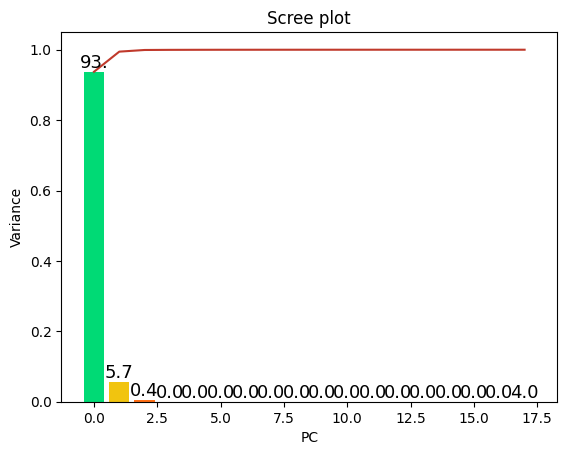

In [7]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_ 
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca1)

In [8]:
pca_r1 = PCA(n_components=2)
pca_array1 = pca_r1.fit_transform(tdata)
pca_df1 = pd.DataFrame(pca_array1, index=tdata.index, columns=['pca1','pca2'])
pca_df1['category'] = ['B', 'B', 'B', 'B', 'L', 'L', 'L', 'L', 'S','B', 'B', 'B', 'B', 'L', 'L', 'L', 'L', 'S']
pca_df1

,pca1,pca2,category
3B1,-172387.523540,-24853.227906,B
3B2,240252.350409,-18518.167333,B
3B3,181307.547385,-16664.258466,B
3B4,386229.960384,-18674.248673,B
3L1,-173228.126445,6415.579980,L
3L2,-18737.096509,34585.816346,L
3L3,-128613.169276,-13587.008935,L
3L4,29325.503150,152389.812052,L
3S1,-173555.484581,-24911.881286,S
4B1,-173001.973449,-26216.598340,B


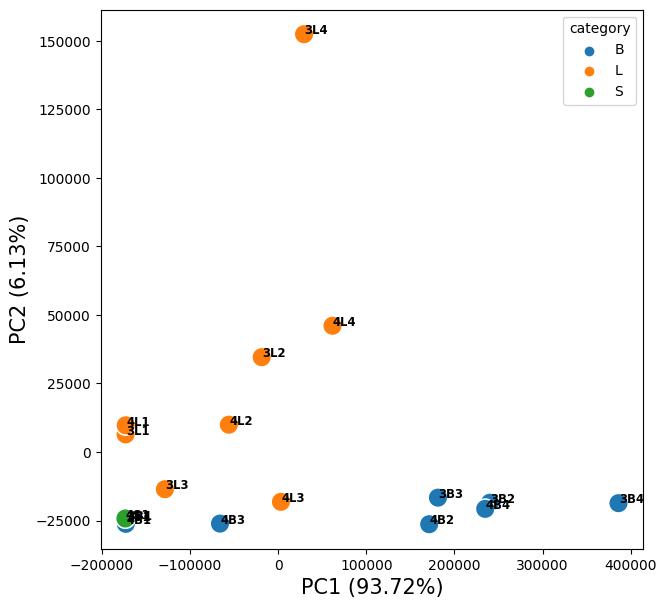

In [54]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=pca_df1,x='pca1',y='pca2',hue=pca_df1['category'], s=200) # absolute, All genes
plt.xlabel('PC1 (93.72%)', fontsize=15)
plt.ylabel('PC2 (6.13%)', fontsize=15)
for line in range(0,pca_df1.shape[0]):
     plt.text(pca_df1.pca1[line]+500, pca_df1.pca2[line], pca_df1.index[line], horizontalalignment='left', size='small', color='black', weight='semibold')
plt.savefig('/Users/csb/Desktop/all.jpg')
plt.show()


In [5]:
cdata = pdata[(pdata['D3B1'] >= 1) | (pdata['D3B2'] >= 1) | (pdata['D3B3'] >= 1) | (pdata['D3B4'] >= 1) | (pdata['D3L1'] >= 1) | (pdata['D3L2'] >= 1) | (pdata['D3L3'] >= 1) | (pdata['D3L4'] >= 1) | (pdata['D3S1'] >= 1) | (pdata['D4B1'] >= 1) | (pdata['D4B2'] >= 1) | (pdata['D4B3'] >= 1) | (pdata['D4B4'] >= 1) | (pdata['D4L1'] >= 1) | (pdata['D4L2'] >= 1) | (pdata['D4L3'] >= 1) | (pdata['D4L4'] >= 1) | (pdata['D4S1'] >= 1)]
cdata

,D3B1,D3B2,D3B3,D3B4,D3L1,D3L2,D3L3,D3L4,D3S1,D4B1,D4B2,D4B3,D4B4,D4L1,D4L2,D4L3,D4L4,D4S1
Name,,,,,,,,,,,,,,,,,,
TRINITY_DN189151_c7_g1_i2,1.54,0.00,0.00,0.87,0.43,0.72,0.00,0.00,0.68,2.31,2.32,0.24,0.00,1.02,0.88,0.00,0.00,1.61
TRINITY_DN187839_c1_g7_i3,0.00,0.00,0.00,0.00,0.18,0.00,0.00,0.00,1.04,0.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95
TRINITY_DN182945_c3_g3_i6,0.57,0.59,0.00,0.00,0.97,0.97,0.00,0.00,0.30,3.43,0.00,1.31,0.00,2.09,0.26,1.33,0.52,1.03
TRINITY_DN167660_c0_g1_i1,1.96,0.00,0.00,0.00,2.15,0.28,1.19,0.00,1.32,0.33,0.90,0.56,0.00,2.19,0.23,2.75,0.00,2.50
TRINITY_DN182743_c0_g1_i4,0.00,3.93,6.30,0.00,0.87,5.10,1.68,2.36,0.23,0.11,8.11,1.28,0.76,3.04,7.58,2.11,3.19,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN155667_c1_g2_i2,6.92,13.99,7.19,1.30,17.08,20.22,27.79,7.99,7.06,8.74,7.06,6.22,10.55,9.60,16.15,12.14,21.58,3.30
TRINITY_DN176676_c2_g3_i2,2.12,0.73,0.34,1.46,0.50,0.40,0.38,0.00,2.93,1.93,0.65,1.56,0.59,0.75,0.49,0.38,0.32,1.01
TRINITY_DN268218_c0_g1_i1,0.00,0.00,0.00,0.00,6.35,8.91,5.92,3.93,0.00,0.00,0.00,0.00,0.00,3.69,3.36,4.54,14.33,0.00


In [6]:
cdata.to_csv('/Users/csb/Desktop/cutoff1_part_diffExpr_P0.05_C2.matrix.txt')

In [15]:
cdata.transpose()
ccdata=cdata.T
ccdata

Name,TRINITY_DN12009_c0_g1_i2,TRINITY_DN70038_c1_g1_i8,TRINITY_DN4014_c0_g1_i1,TRINITY_DN3079_c0_g2_i1,TRINITY_DN1793_c0_g1_i3,TRINITY_DN1280_c0_g1_i2,TRINITY_DN2804_c1_g2_i1,TRINITY_DN133546_c0_g1_i1,TRINITY_DN31717_c0_g1_i5,TRINITY_DN1480_c0_g1_i3,...,TRINITY_DN15706_c1_g1_i51,TRINITY_DN1050_c0_g1_i4,TRINITY_DN22693_c0_g2_i1,TRINITY_DN7281_c0_g1_i5,TRINITY_DN4600_c0_g1_i5,TRINITY_DN73780_c0_g1_i2,TRINITY_DN4301_c0_g2_i3,TRINITY_DN145_c0_g1_i22,TRINITY_DN6990_c0_g1_i6,TRINITY_DN12755_c0_g1_i2
3B1,1.16,0.81,0.00,1.61,6.53,3.61,0.00,0.00,3.29,1.74,...,0.46,3.82,0.55,1.09,2.72,1.76,4.18,0.48,0.00,0.68
3B2,0.62,2.77,0.40,0.42,16.66,45.07,0.00,0.00,1.07,2.30,...,0.95,1.09,0.00,2.59,0.74,0.29,0.60,0.00,0.92,0.00
3B3,3.33,1.26,0.15,0.55,9.72,40.19,0.00,0.00,1.07,0.84,...,0.00,0.79,0.00,2.05,2.39,0.13,1.28,0.00,1.90,0.00
3B4,5.47,0.16,0.00,0.23,11.69,24.37,0.00,0.00,5.29,1.93,...,0.00,0.46,0.27,0.14,1.35,1.79,0.77,0.00,2.17,2.61
3L1,11.12,0.47,0.36,1.23,6.72,9.29,0.43,0.37,4.83,2.23,...,0.95,6.50,1.99,7.45,10.28,0.56,0.13,1.18,0.19,0.00
3L2,14.66,1.59,0.00,1.67,12.84,23.83,0.00,0.00,4.35,4.51,...,0.00,1.73,1.07,8.80,4.54,0.09,0.06,0.00,2.76,0.00
3L3,37.63,0.26,0.54,0.34,7.69,10.59,0.44,0.68,4.90,6.31,...,3.62,2.94,1.65,4.98,2.90,0.30,0.13,0.24,1.50,0.00
3L4,9.02,0.28,0.00,1.02,10.85,18.83,0.00,0.83,1.53,3.41,...,0.00,1.40,0.23,5.16,8.16,0.32,0.34,0.00,2.32,0.00
3S1,1.32,0.65,0.12,0.12,4.74,5.09,0.00,0.09,4.08,1.54,...,0.70,3.01,0.85,1.76,3.10,0.50,0.28,0.71,0.00,1.26
4B1,0.97,1.05,0.25,1.29,6.53,1.19,0.00,0.62,7.17,1.62,...,0.14,3.42,0.96,1.15,1.55,1.96,5.80,0.48,0.49,0.87


In [16]:
pca2= PCA(n_components=18)
pca_fit2 = pca2.fit(ccdata)
pca_pred2 = pd.DataFrame(pca2.fit_transform(ccdata), index=ccdata.index, columns=[f"pca{num+1}" for num in range(ccdata.shape[0])])
pca_pred2

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18
3B1,-172387.522179,-24853.225769,11291.390111,-2148.088952,-1610.719112,-665.135241,784.373409,458.157596,-229.395791,611.592730,1185.452043,-19.650086,-148.901585,-315.703178,-49.524817,171.128957,-467.151532,1.739915e-10
3B2,240252.349576,-18518.167213,-14545.532973,-254.817447,-2104.032376,-1354.381176,-670.531514,174.293558,2345.383400,449.330007,-91.649308,222.676458,-74.225091,-299.846542,-62.415940,72.498251,-7.407528,1.739915e-10
3B3,181307.546351,-16664.258800,21245.389755,-33.696598,-1299.477095,3126.492278,-2267.987909,-280.169496,-413.376456,-531.806506,-44.239792,58.323938,-16.489382,-625.930020,2.880422,94.285300,50.630598,1.739915e-10
3B4,386229.959770,-18674.246749,-13294.747708,-1963.712648,-921.248884,2368.045037,2742.341544,266.637390,-842.674095,101.556719,-97.678228,-94.818778,165.911316,-79.313398,5.233476,-31.314222,12.979153,1.739915e-10
3L1,-173228.125580,6415.579168,-1769.008690,-93.585261,2888.643145,2316.305362,495.685319,-180.937808,727.199357,184.732845,74.858295,-138.311254,-97.220661,188.691603,541.791512,646.981281,143.473930,1.739915e-10
3L2,-18737.097205,34585.814186,3496.466784,10672.386905,-1933.825157,-102.308292,962.403037,169.315692,-124.029372,-433.743898,10.475739,714.585326,-630.874547,124.512896,-79.306013,60.389834,2.009175,1.739915e-10
3L3,-128613.169420,-13587.010890,-4070.715276,589.218944,1336.818675,1289.690381,-235.303894,-2117.323295,-212.327692,1289.396870,-620.877575,-182.102891,-661.454440,-50.122450,-210.435207,-303.388079,-33.773836,1.739915e-10
3L4,29325.501861,152389.809543,4882.639818,-4627.073412,-1743.217606,-348.944260,138.997631,-1035.444695,155.169195,-120.503655,90.304348,-45.665866,166.612243,108.345963,-2.900010,-46.662219,-20.115443,1.739915e-10
3S1,-173555.483571,-24911.880162,896.565603,-2153.226521,-1498.949092,-642.779734,299.976414,340.378238,37.311236,-446.640982,-709.657176,378.098762,9.137690,-137.672105,782.494911,-485.068711,-88.318379,1.739915e-10
4B1,-173001.972393,-26216.596191,5744.248040,-2339.168312,-1917.874978,-990.001259,471.122825,274.704621,-203.443574,340.421083,751.279651,188.635104,41.942514,-75.650625,-158.840466,-129.904822,621.311872,1.739915e-10


In [17]:
result2 = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca2.explained_variance_,
                      '기여율':pca2.explained_variance_ratio_},
                     index = np.array([f"{num+1}" for num in range(ccdata.shape[0])]))
result2['누적기여율'] = result2['기여율'].cumsum()
result2

,설명가능한 분산 비율(고윳값),기여율,누적기여율
1,3.136581e+10,9.372898e-01,0.937290
2,1.916476e+09,5.726914e-02,0.994559
3,1.568750e+08,4.687822e-03,0.999247
4,1.270395e+07,3.796260e-04,0.999626
5,5.278453e+06,1.577335e-04,0.999784
6,2.904989e+06,8.680843e-05,0.999871
7,1.245311e+06,3.721304e-05,0.999908
8,1.006626e+06,3.008053e-05,0.999938
9,5.951877e+05,1.778571e-05,0.999956
10,3.713791e+05,1.109775e-05,0.999967


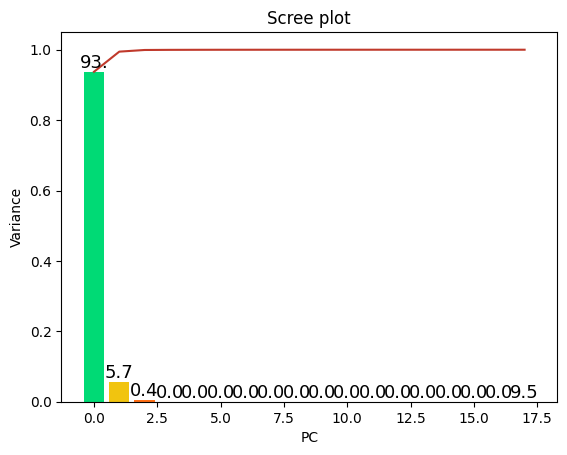

In [18]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_ 
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca2)

In [19]:
pca_r2 = PCA(n_components=2)
pca_array2 = pca_r2.fit_transform(ccdata)
pca_df2 = pd.DataFrame(pca_array2, index=ccdata.index, columns=['pca1','pca2'])
pca_df2['category'] = ['B', 'B', 'B', 'B', 'L', 'L', 'L', 'L', 'S','B', 'B', 'B', 'B', 'L', 'L', 'L', 'L', 'S']
pca_df2

,pca1,pca2,category
3B1,-172387.522179,-24853.225769,B
3B2,240252.349576,-18518.167213,B
3B3,181307.546351,-16664.258800,B
3B4,386229.959770,-18674.246749,B
3L1,-173228.125580,6415.579168,L
3L2,-18737.097205,34585.814186,L
3L3,-128613.169420,-13587.010890,L
3L4,29325.501861,152389.809543,L
3S1,-173555.483571,-24911.880162,S
4B1,-173001.972393,-26216.596191,B


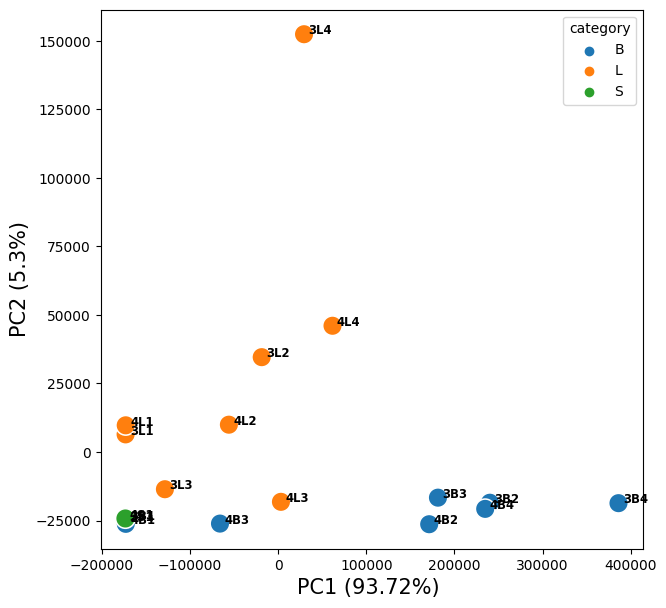

In [56]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=pca_df2,x='pca1',y='pca2',hue=pca_df2['category'], s=200) # absolute, cutoff
plt.xlabel('PC1 (93.72%) ', fontsize=15)
plt.ylabel('PC2 (5.3%)', fontsize=15)
for line in range(0,pca_df2.shape[0]):
     plt.text(pca_df2.pca1[line]+5000, pca_df2.pca2[line], pca_df2.index[line], horizontalalignment='left', size='small', color='black', weight='semibold')
plt.savefig('/Users/csb/Desktop/cutoff.jpg')
plt.show()


In [41]:
logtdata = np.log2(tdata + 1)
logtdata

Name,TRINITY_DN9541_c0_g1_i1,TRINITY_DN23146_c7_g1_i2,TRINITY_DN12009_c0_g1_i2,TRINITY_DN11413_c0_g1_i8,TRINITY_DN57793_c0_g1_i6,TRINITY_DN70038_c1_g1_i8,TRINITY_DN172600_c0_g2_i1,TRINITY_DN110992_c0_g1_i1,TRINITY_DN4014_c0_g1_i1,TRINITY_DN3079_c0_g2_i1,...,TRINITY_DN4600_c0_g1_i5,TRINITY_DN73780_c0_g1_i2,TRINITY_DN9399_c0_g1_i14,TRINITY_DN4301_c0_g2_i3,TRINITY_DN85171_c0_g1_i1,TRINITY_DN145_c0_g1_i22,TRINITY_DN112239_c0_g1_i1,TRINITY_DN6990_c0_g1_i6,TRINITY_DN237605_c0_g1_i1,TRINITY_DN12755_c0_g1_i2
3B1,0.176323,0.000000,1.111031,0.505891,0.000000,0.855990,0.000000,0.000000,0.000000,1.384050,...,1.895303,1.464668,0.000000,2.372952,0.432959,0.565597,0.454176,0.000000,0.275007,0.748461
3B2,0.641546,0.000000,0.695994,0.000000,0.000000,1.914565,0.000000,0.895303,0.485427,0.505891,...,0.799087,0.367371,0.000000,0.678072,0.000000,0.000000,0.000000,0.941106,0.000000,0.000000
3B3,0.000000,0.000000,2.114367,0.000000,0.000000,1.176323,0.000000,0.000000,0.201634,0.632268,...,1.761285,0.176323,0.000000,1.189034,0.000000,0.000000,0.000000,1.536053,0.000000,0.000000
3B4,0.000000,0.000000,2.693766,0.000000,0.000000,0.214125,0.000000,0.925999,0.000000,0.298658,...,1.232661,1.480265,0.000000,0.823749,0.000000,0.000000,0.000000,1.664483,0.000000,1.851999
3L1,0.263034,0.286881,3.599318,0.000000,0.214125,0.555816,0.000000,0.176323,0.443607,1.157044,...,3.495695,0.641546,0.014355,0.176323,0.000000,1.124328,0.000000,0.250962,0.000000,0.000000
3L2,0.000000,0.000000,3.969012,0.000000,0.000000,1.372952,0.000000,0.000000,0.000000,1.416840,...,2.469886,0.124328,0.000000,0.084064,0.298658,0.000000,0.000000,1.910733,0.000000,0.000000
3L3,0.000000,0.000000,5.271650,0.565597,0.000000,0.333424,0.000000,0.000000,0.622930,0.422233,...,1.963474,0.378512,0.042644,0.176323,0.000000,0.310340,0.000000,1.321928,0.000000,0.000000
3L4,0.000000,0.000000,3.324811,0.000000,0.000000,0.356144,0.000000,0.000000,0.000000,1.014355,...,3.195348,0.400538,0.000000,0.422233,0.000000,0.000000,0.000000,1.731183,0.000000,0.000000
3S1,0.389567,0.000000,1.214125,0.536053,0.070389,0.722466,0.000000,0.124328,0.163499,0.163499,...,2.035624,0.584963,0.214125,0.356144,0.000000,0.773996,0.000000,0.000000,0.000000,1.176323
4B1,0.097611,0.545968,0.978196,0.722466,0.356144,1.035624,0.000000,0.263034,0.321928,1.195348,...,1.350497,1.565597,0.000000,2.765535,0.000000,0.565597,0.000000,0.575312,0.201634,0.903038


In [42]:
pca3 = PCA(n_components=18)
pca_fit3 = pca3.fit(logtdata)
pca_pred3 = pd.DataFrame(pca3.fit_transform(logtdata), index=logtdata.index, columns=[f"pca{num+1}" for num in range(logtdata.shape[0])])
pca_pred3

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18
3B1,45.015860,77.602936,46.451201,-68.475418,24.621521,0.370123,37.081507,0.570040,-18.686825,25.448591,2.448128,18.512160,39.920330,4.694878,-42.145250,-28.666818,-20.143671,7.333011e-14
3B2,65.840296,-99.547907,79.444387,1.829882,40.083972,-9.127490,-9.248648,16.387987,29.108008,53.844820,54.944130,-43.183752,-16.378028,-5.877596,6.485541,1.611752,0.768097,7.333011e-14
3B3,115.788630,-61.563123,-40.278933,50.333212,25.000543,81.072838,-19.589736,52.181259,14.584263,-6.337900,-13.596380,35.541366,35.824116,-0.427270,4.226374,0.488379,-0.470293,7.333011e-14
3B4,109.432517,-35.797856,-67.589200,-25.318959,18.845754,-7.129053,72.372275,-44.617244,37.249086,-55.976452,26.250213,0.377770,-15.976672,-4.529466,3.801318,0.766401,-0.197147,7.333011e-14
3L1,-101.915492,54.310713,-4.629702,-25.792389,36.652855,20.946488,19.787486,29.959778,-3.624854,5.545941,7.330695,24.989451,-35.453129,-5.672286,-10.226368,-4.195972,54.423687,7.333011e-14
3L2,-69.889787,-80.074139,59.847139,46.628717,-11.263783,3.330921,51.854829,3.200714,-47.311703,-15.795231,4.016825,10.674146,-5.746373,60.231746,12.036794,4.471334,-6.004866,7.333011e-14
3L3,-89.312861,-6.313534,-1.668418,24.823256,-43.459879,23.510667,50.377749,-31.221454,26.147878,59.697660,-30.600450,18.726686,0.997647,-33.668688,29.964064,-10.505869,-9.238430,7.333011e-14
3L4,-53.791425,-73.675729,-73.024688,-15.722196,88.096722,-31.720685,-15.043371,-18.748371,-30.018841,13.061289,-58.491722,-33.024973,11.286748,0.701665,4.872127,0.919173,-1.847507,7.333011e-14
3S1,37.274336,112.378889,1.754946,99.491422,25.831271,-29.216301,-0.819765,-16.527695,-3.051086,13.150518,-1.948432,13.311937,-22.266386,-9.465849,-30.677180,41.363614,-11.450642,7.333011e-14
4B1,63.974970,89.371696,33.223722,-60.354713,-12.255031,10.681365,-5.424139,-9.198523,-32.517869,-2.622795,5.133569,-9.342502,34.454423,-5.454235,43.449782,45.991475,11.156145,7.333011e-14


In [43]:
result3 = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca3.explained_variance_,
                      '기여율':pca3.explained_variance_ratio_},
                     index = np.array([f"{num+1}" for num in range(logtdata.shape[0])]))
result3['누적기여율'] = result3['기여율'].cumsum()
result3

,설명가능한 분산 비율(고윳값),기여율,누적기여율
1,6.791886e+03,2.392240e-01,0.239224
2,5.146591e+03,1.812733e-01,0.420497
3,2.777213e+03,9.781904e-02,0.518316
4,1.963530e+03,6.915951e-02,0.587476
5,1.536768e+03,5.412806e-02,0.641604
6,1.448384e+03,5.101501e-02,0.692619
7,1.257183e+03,4.428051e-02,0.736899
8,1.054979e+03,3.715850e-02,0.774058
9,9.881728e+02,3.480544e-02,0.808863
10,9.724494e+02,3.425163e-02,0.843115


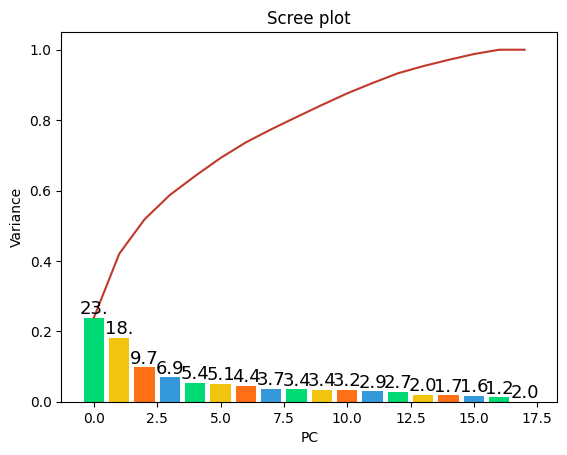

In [44]:
scree_plot(pca3)

In [45]:
pca_r3 = PCA(n_components=2)
pca_array3 = pca_r3.fit_transform(logtdata)
pca_df3 = pd.DataFrame(pca_array3, index=logtdata.index, columns=['pca1','pca2'])
pca_df3['category'] = ['B', 'B', 'B', 'B', 'L', 'L', 'L', 'L', 'S','B', 'B', 'B', 'B', 'L', 'L', 'L', 'L', 'S']
pca_df3

,pca1,pca2,category
3B1,45.018583,77.603452,B
3B2,65.842390,-99.547101,B
3B3,115.788441,-61.563045,B
3B4,109.431843,-35.798073,B
3L1,-101.917143,54.309904,L
3L2,-69.897012,-80.076497,L
3L3,-89.300159,-6.309007,L
3L4,-53.787652,-73.674307,L
3S1,37.275958,112.379991,S
4B1,63.972723,89.371956,B


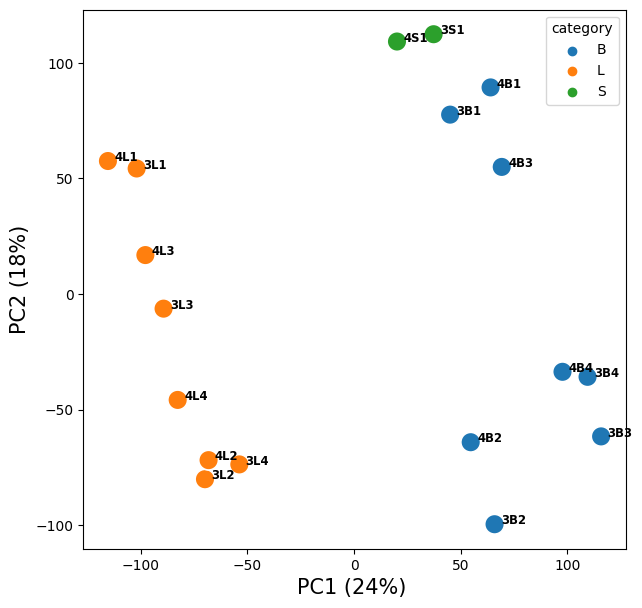

In [55]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=pca_df3,x='pca1',y='pca2',hue=pca_df3['category'], s=200) # log, all
plt.xlabel('PC1 (24%) ', fontsize=15)
plt.ylabel('PC2 (18%)', fontsize=15)
for line in range(0,pca_df3.shape[0]):
     plt.text(pca_df3.pca1[line]+3, pca_df3.pca2[line], pca_df3.index[line], horizontalalignment='left', size='small', color='black', weight='semibold')
plt.savefig('/Users/csb/Desktop/log.jpg')
plt.show()

In [47]:
logccdata = np.log2(ccdata + 1)
logccdata

Name,TRINITY_DN12009_c0_g1_i2,TRINITY_DN70038_c1_g1_i8,TRINITY_DN4014_c0_g1_i1,TRINITY_DN3079_c0_g2_i1,TRINITY_DN1793_c0_g1_i3,TRINITY_DN1280_c0_g1_i2,TRINITY_DN2804_c1_g2_i1,TRINITY_DN133546_c0_g1_i1,TRINITY_DN31717_c0_g1_i5,TRINITY_DN1480_c0_g1_i3,...,TRINITY_DN15706_c1_g1_i51,TRINITY_DN1050_c0_g1_i4,TRINITY_DN22693_c0_g2_i1,TRINITY_DN7281_c0_g1_i5,TRINITY_DN4600_c0_g1_i5,TRINITY_DN73780_c0_g1_i2,TRINITY_DN4301_c0_g2_i3,TRINITY_DN145_c0_g1_i22,TRINITY_DN6990_c0_g1_i6,TRINITY_DN12755_c0_g1_i2
3B1,1.111031,0.855990,0.000000,1.384050,2.912650,2.204767,0.000000,0.000000,2.100978,1.454176,...,0.545968,2.269033,0.632268,1.063503,1.895303,1.464668,2.372952,0.565597,0.000000,0.748461
3B2,0.695994,1.914565,0.485427,0.505891,4.142413,5.525756,0.000000,0.000000,1.049631,1.722466,...,0.963474,1.063503,0.000000,1.843984,0.799087,0.367371,0.678072,0.000000,0.941106,0.000000
3B3,2.114367,1.176323,0.201634,0.632268,3.422233,5.364222,0.000000,0.000000,1.049631,0.879706,...,0.000000,0.839960,0.000000,1.608809,1.761285,0.176323,1.189034,0.000000,1.536053,0.000000
3B4,2.693766,0.214125,0.000000,0.298658,3.665620,4.665052,0.000000,0.000000,2.653060,1.550901,...,0.000000,0.545968,0.344828,0.189034,1.232661,1.480265,0.823749,0.000000,1.664483,1.851999
3L1,3.599318,0.555816,0.443607,1.157044,2.948601,3.363171,0.516015,0.454176,2.543496,1.691534,...,0.963474,2.906891,1.580145,3.078951,3.495695,0.641546,0.176323,1.124328,0.250962,0.000000
3L2,3.969012,1.372952,0.000000,1.416840,3.790772,4.634012,0.000000,0.000000,2.419539,2.462052,...,0.000000,1.448901,1.049631,3.292782,2.469886,0.124328,0.084064,0.000000,1.910733,0.000000
3L3,5.271650,0.333424,0.622930,0.422233,3.119356,3.534809,0.526069,0.748461,2.560715,2.869871,...,2.207893,1.978196,1.405992,2.580145,1.963474,0.378512,0.176323,0.310340,1.321928,0.000000
3L4,3.324811,0.356144,0.000000,1.014355,3.566815,4.309613,0.000000,0.871844,1.339137,2.140779,...,0.000000,1.263034,0.298658,2.622930,3.195348,0.400538,0.422233,0.000000,1.731183,0.000000
3S1,1.214125,0.722466,0.163499,0.163499,2.521051,2.606442,0.000000,0.124328,2.344828,1.344828,...,0.765535,2.003602,0.887525,1.464668,2.035624,0.584963,0.356144,0.773996,0.000000,1.176323
4B1,0.978196,1.035624,0.321928,1.195348,2.912650,1.130931,0.000000,0.695994,3.030336,1.389567,...,0.189034,2.144046,0.970854,1.104337,1.350497,1.565597,2.765535,0.565597,0.575312,0.903038


In [48]:
pca4 = PCA(n_components=18)
pca_fit4 = pca4.fit(logccdata)
pca_pred4 = pd.DataFrame(pca4.fit_transform(logccdata), index=logccdata.index, columns=[f"pca{num+1}" for num in range(logccdata.shape[0])])
pca_pred4

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18
3B1,46.826120,69.657598,43.644979,-65.908922,21.051322,0.736793,32.870296,1.580493,-0.511932,-27.186627,8.416835,19.862049,39.167283,3.162704,22.784156,-36.282008,-22.368266,9.811968e-14
3B2,62.510373,-100.937121,76.172369,-1.383202,38.999329,-9.911995,-9.316776,12.827206,59.822979,-17.338255,49.390167,-40.431848,-12.922507,-5.126679,-4.557735,3.326802,1.085613,9.811968e-14
3B3,113.022903,-60.572889,-40.465660,51.805518,24.990791,79.789706,-20.305235,47.230032,8.029000,13.609160,-15.800667,33.034339,30.797559,-0.212661,-2.752430,1.741227,-0.349238,9.811968e-14
3B4,106.934911,-33.727338,-67.664634,-23.775087,15.198524,-7.354306,73.221859,-41.909382,-1.702432,64.506189,14.169844,-2.404905,-15.334950,-4.198263,-2.908809,1.977492,0.066111,9.811968e-14
3L1,-98.545582,54.973315,-3.441606,-25.423299,34.498622,20.723521,19.308858,29.836721,2.244988,-4.027753,10.437160,22.969642,-32.085970,-5.591397,8.421051,-14.041015,47.069182,9.811968e-14
3L2,-71.388542,-77.970036,57.864601,44.892876,-12.265892,2.145698,48.778503,6.828660,-44.116821,-12.815000,13.201257,11.482964,-5.370263,55.757376,-7.750953,7.371332,-4.799463,9.811968e-14
3L3,-88.244089,-3.307021,-0.490239,24.929723,-43.935028,22.933802,47.703653,-30.007557,50.124267,-38.102917,-28.591548,19.764300,0.741116,-30.456876,-28.017852,3.416331,-7.108742,9.811968e-14
3L4,-56.516415,-66.923651,-74.559615,-14.016334,86.700881,-32.151083,-10.671377,-15.865540,-22.062992,-38.490573,-47.737386,-26.973042,10.900391,0.999741,-3.664001,3.047944,-1.201102,9.811968e-14
3S1,40.223706,108.019731,7.743132,94.985422,25.197282,-30.011390,-0.269314,-15.037496,4.447242,-11.216099,0.568622,12.120445,-22.361236,-8.935573,41.766034,22.062805,-8.913433,9.811968e-14
4B1,65.192935,82.245148,32.169603,-57.343499,-10.613857,10.531990,-4.303721,-7.297029,-24.491072,-15.238058,9.786737,-5.575663,33.346263,-3.284776,-15.979829,52.162737,15.126526,9.811968e-14


In [49]:
result4 = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca4.explained_variance_,
                      '기여율':pca4.explained_variance_ratio_},
                     index = np.array([f"{num+1}" for num in range(logccdata.shape[0])]))
result4['누적기여율'] = result4['기여율'].cumsum()
result4

,설명가능한 분산 비율(고윳값),기여율,누적기여율
1,6.620414e+03,2.508769e-01,0.250877
2,4.762920e+03,1.804882e-01,0.431365
3,2.648919e+03,1.003793e-01,0.531744
4,1.825332e+03,6.916994e-02,0.600914
5,1.445171e+03,5.476396e-02,0.655678
6,1.353099e+03,5.127491e-02,0.706953
7,1.155293e+03,4.377919e-02,0.750732
8,9.631175e+02,3.649680e-02,0.787229
9,8.952819e+02,3.392621e-02,0.821155
10,8.793464e+02,3.332234e-02,0.854478


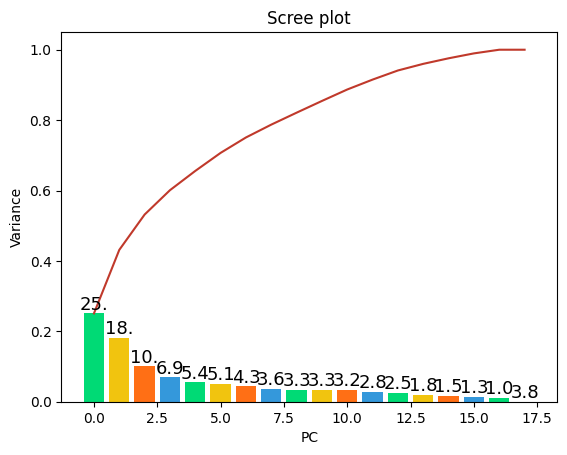

In [50]:
scree_plot(pca4)

In [51]:
pca_r4 = PCA(n_components=2)
pca_array4 = pca_r4.fit_transform(logccdata)
pca_df4 = pd.DataFrame(pca_array4, index=logccdata.index, columns=['pca1','pca2'])
pca_df4['category'] = ['B', 'B', 'B', 'B', 'L', 'L', 'L', 'L', 'S','B', 'B', 'B', 'B', 'L', 'L', 'L', 'L', 'S']
pca_df4

,pca1,pca2,category
3B1,46.824853,69.658043,B
3B2,62.509007,-100.937226,B
3B3,113.022592,-60.572324,B
3B4,106.936878,-33.730075,B
3L1,-98.545367,54.970174,L
3L2,-71.389009,-77.970056,L
3L3,-88.244960,-3.305533,L
3L4,-56.517023,-66.918171,L
3S1,40.223609,108.019224,S
4B1,65.192811,82.244042,B


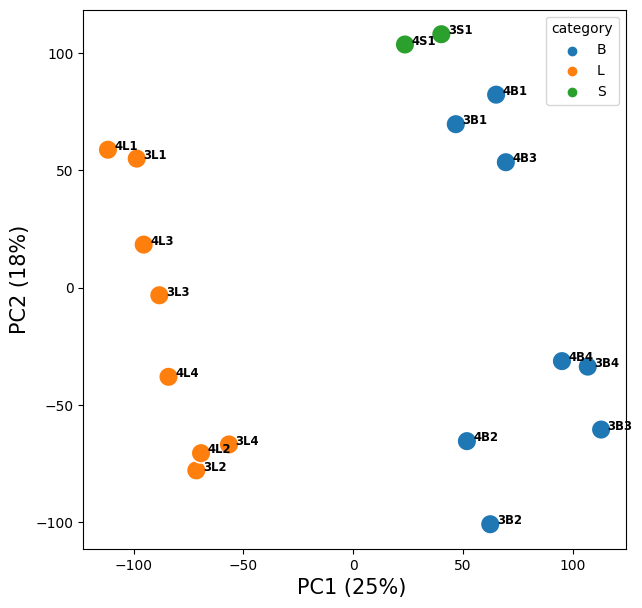

In [52]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=pca_df4,x='pca1',y='pca2',hue=pca_df4['category'], s=200) # log,FPKM>1
plt.xlabel('PC1 (25%) ', fontsize=15)
plt.ylabel('PC2 (18%)', fontsize=15)
for line in range(0,pca_df4.shape[0]):
     plt.text(pca_df4.pca1[line]+3, pca_df4.pca2[line], pca_df4.index[line], horizontalalignment='left', size='small', color='black', weight='semibold')
plt.savefig('/Users/csb/Desktop/logcutoff.jpg')
plt.show()

In [7]:
data = pd.read_csv('python_cutoff_1.csv')
data

,Unnamed: 0,3b1_rsem_out,3b2_rsem_out,3b3_rsem_out,3b4_rsem_out,3l1_rsem_out,3l2_rsem_out,3l3_rsem_out,3l4_rsem_out,3s1_rsem_out,4b1_rsem_out,4b2_rsem_out,4b3_rsem_out,4b4_rsem_out,4l1_rsem_out,4l2_rsem_out,4l3_rsem_out,4l4_rsem_out,4s1_rsem_out
0,TRINITY_DN168060_c0_g1_i2,0.46,0.00,0.00,0.00,0.97,0.00,2.45,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,TRINITY_DN187086_c0_g2_i4,2.24,9.97,0.14,0.82,1.45,3.98,7.49,1.69,2.74,2.50,1.52,1.41,1.97,2.54,2.75,0.74,2.17,1.60
2,TRINITY_DN176676_c2_g12_i1,7.65,7.17,10.28,6.37,6.65,4.79,5.22,2.50,5.93,6.35,7.25,6.22,5.80,2.96,4.63,5.05,5.60,5.20
3,TRINITY_DN179789_c5_g1_i3,2.57,0.00,2.31,3.89,3.95,0.46,5.92,3.06,5.04,2.83,1.11,5.90,4.34,3.75,0.00,3.22,4.90,5.51
4,TRINITY_DN189251_c12_g3_i6,4.14,8.55,28.68,14.45,1.32,1.89,1.27,0.41,18.67,4.52,2.55,22.96,7.43,0.70,0.00,0.12,3.71,5.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97100,TRINITY_DN153938_c1_g1_i1,8.12,22.87,23.95,13.15,23.27,13.92,27.82,15.22,5.60,8.71,24.39,34.96,7.57,40.19,41.84,37.19,11.88,8.26
97101,TRINITY_DN88285_c1_g1_i1,0.81,0.00,0.00,0.00,0.00,0.00,0.28,0.00,2.26,4.20,0.00,6.16,0.00,0.33,0.00,0.00,0.00,0.39
97102,TRINITY_DN180984_c0_g9_i1,1.48,0.00,0.00,0.00,1.57,0.42,0.40,0.00,0.99,0.06,2.03,0.00,0.00,0.12,1.08,0.35,1.34,1.72
97103,TRINITY_DN182096_c1_g4_i4,2.65,6.73,6.20,3.84,3.49,5.60,5.94,5.03,1.85,2.99,5.96,3.33,4.66,2.36,8.49,3.17,5.26,0.99


In [8]:
corr_matrix=data.corr(method='pearson')
corr_matrix

/var/folders/6s/k1bd82wd58b1zy8ttygkfwtw0000gn/T/ipykernel_2542/762531006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr(method='pearson')


,3b1_rsem_out,3b2_rsem_out,3b3_rsem_out,3b4_rsem_out,3l1_rsem_out,3l2_rsem_out,3l3_rsem_out,3l4_rsem_out,3s1_rsem_out,4b1_rsem_out,4b2_rsem_out,4b3_rsem_out,4b4_rsem_out,4l1_rsem_out,4l2_rsem_out,4l3_rsem_out,4l4_rsem_out,4s1_rsem_out
3b1_rsem_out,1.000000,0.691966,0.733964,0.784337,0.631056,0.605531,0.670670,0.588895,0.799031,0.950336,0.782821,0.770416,0.772554,0.630520,0.619331,0.650555,0.605389,0.772175
3b2_rsem_out,0.691966,1.000000,0.966493,0.959833,0.885397,0.927053,0.871525,0.931604,0.738165,0.645834,0.907500,0.746547,0.940469,0.881493,0.921449,0.868515,0.920003,0.746165
3b3_rsem_out,0.733964,0.966493,1.000000,0.973820,0.930543,0.937016,0.937466,0.918477,0.829547,0.714847,0.943238,0.867092,0.948136,0.927527,0.939426,0.927634,0.944900,0.789286
3b4_rsem_out,0.784337,0.959833,0.973820,1.000000,0.876566,0.890588,0.879964,0.892558,0.804650,0.755472,0.941086,0.829688,0.979727,0.872787,0.890153,0.873669,0.900007,0.797460
3l1_rsem_out,0.631056,0.885397,0.930543,0.876566,1.000000,0.978020,0.984210,0.944023,0.800867,0.596415,0.829488,0.819063,0.840371,0.997919,0.982956,0.978592,0.986454,0.745471
3l2_rsem_out,0.605531,0.927053,0.937016,0.890588,0.978020,1.000000,0.952903,0.972806,0.746501,0.562319,0.821948,0.758921,0.851384,0.974373,0.997425,0.942760,0.989130,0.722733
3l3_rsem_out,0.670670,0.871525,0.937466,0.879964,0.984210,0.952903,1.000000,0.895526,0.848271,0.656330,0.872274,0.886309,0.848003,0.983213,0.965346,0.990014,0.959862,0.768773
3l4_rsem_out,0.588895,0.931604,0.918477,0.892558,0.944023,0.972806,0.895526,1.000000,0.680159,0.528346,0.770590,0.669079,0.850482,0.938268,0.961003,0.885494,0.978124,0.696797
3s1_rsem_out,0.799031,0.738165,0.829547,0.804650,0.800867,0.746501,0.848271,0.680159,1.000000,0.816448,0.841513,0.905872,0.805654,0.806261,0.766862,0.831841,0.753287,0.882804
4b1_rsem_out,0.950336,0.645834,0.714847,0.755472,0.596415,0.562319,0.656330,0.528346,0.816448,1.000000,0.799555,0.819036,0.765416,0.600857,0.583090,0.635225,0.566808,0.783582


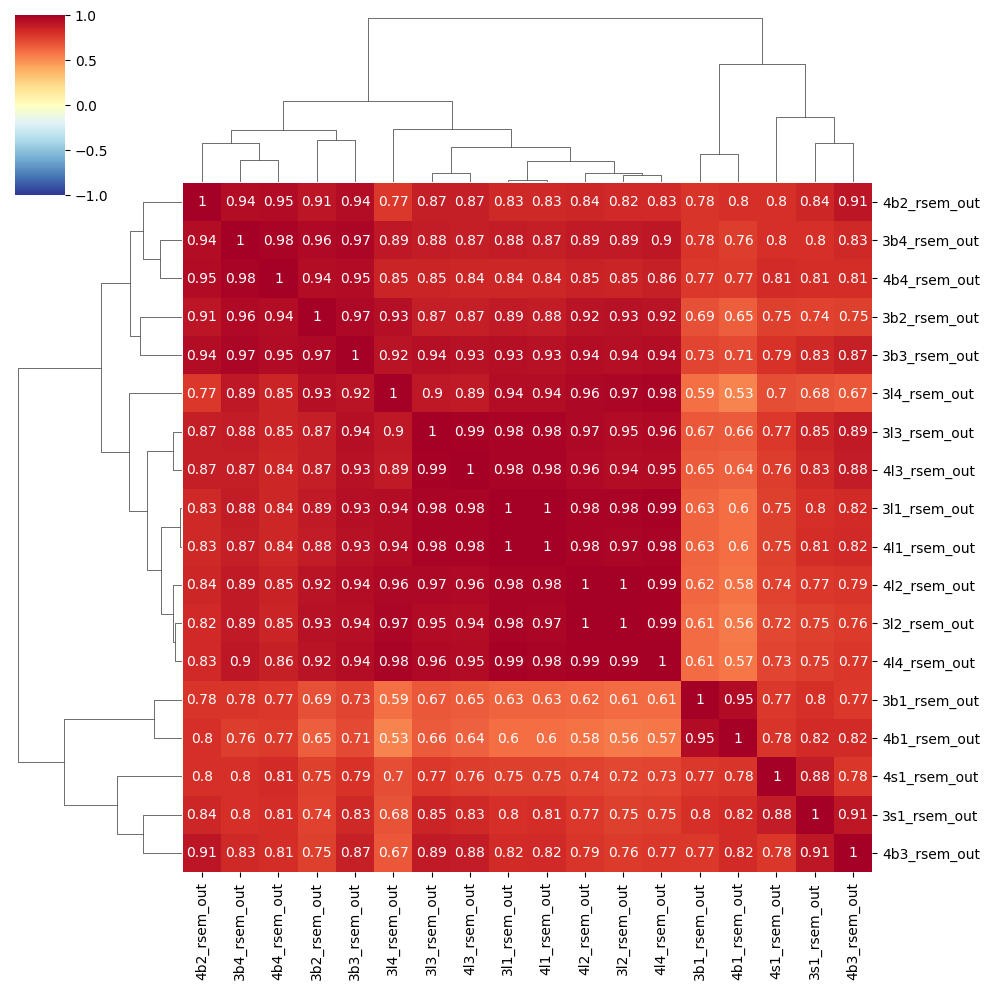

In [9]:
sns.clustermap(corr_matrix, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [10]:
corr_matrix2=data.corr(method='spearman')
corr_matrix2

/var/folders/6s/k1bd82wd58b1zy8ttygkfwtw0000gn/T/ipykernel_2542/1708007833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2=data.corr(method='spearman')


,3b1_rsem_out,3b2_rsem_out,3b3_rsem_out,3b4_rsem_out,3l1_rsem_out,3l2_rsem_out,3l3_rsem_out,3l4_rsem_out,3s1_rsem_out,4b1_rsem_out,4b2_rsem_out,4b3_rsem_out,4b4_rsem_out,4l1_rsem_out,4l2_rsem_out,4l3_rsem_out,4l4_rsem_out,4s1_rsem_out
3b1_rsem_out,1.000000,0.592448,0.547783,0.578653,0.711137,0.605879,0.644953,0.567914,0.680528,0.747465,0.596361,0.660236,0.551116,0.648454,0.592005,0.619310,0.526984,0.672160
3b2_rsem_out,0.592448,1.000000,0.622672,0.584419,0.569004,0.640501,0.595872,0.606259,0.567355,0.568316,0.643703,0.585010,0.566974,0.536217,0.633461,0.547299,0.562011,0.549575
3b3_rsem_out,0.547783,0.622672,1.000000,0.634587,0.537018,0.582791,0.569437,0.602705,0.609168,0.555988,0.564735,0.646930,0.610138,0.500234,0.575008,0.510691,0.557525,0.558319
3b4_rsem_out,0.578653,0.584419,0.634587,1.000000,0.540125,0.557426,0.560187,0.599807,0.589223,0.578069,0.552714,0.620680,0.618924,0.501832,0.546855,0.505878,0.553614,0.553398
3l1_rsem_out,0.711137,0.569004,0.537018,0.540125,1.000000,0.726836,0.803671,0.677304,0.722165,0.647042,0.555247,0.654216,0.520698,0.831783,0.712011,0.769723,0.673829,0.703876
3l2_rsem_out,0.605879,0.640501,0.582791,0.557426,0.726836,1.000000,0.760412,0.676711,0.629104,0.559428,0.612798,0.601373,0.552530,0.686815,0.760037,0.693080,0.668218,0.619296
3l3_rsem_out,0.644953,0.595872,0.569437,0.560187,0.803671,0.760412,1.000000,0.691722,0.697152,0.604230,0.577604,0.653383,0.560962,0.750395,0.744235,0.775127,0.708140,0.677482
3l4_rsem_out,0.567914,0.606259,0.602705,0.599807,0.677304,0.676711,0.691722,1.000000,0.606456,0.541783,0.577880,0.596170,0.579980,0.648769,0.670519,0.639978,0.687798,0.583627
3s1_rsem_out,0.680528,0.567355,0.609168,0.589223,0.722165,0.629104,0.697152,0.606456,1.000000,0.671293,0.539607,0.730632,0.564644,0.670059,0.622375,0.641896,0.589949,0.825042
4b1_rsem_out,0.747465,0.568316,0.555988,0.578069,0.647042,0.559428,0.604230,0.541783,0.671293,1.000000,0.619042,0.730806,0.592581,0.659388,0.600599,0.631555,0.548372,0.709656


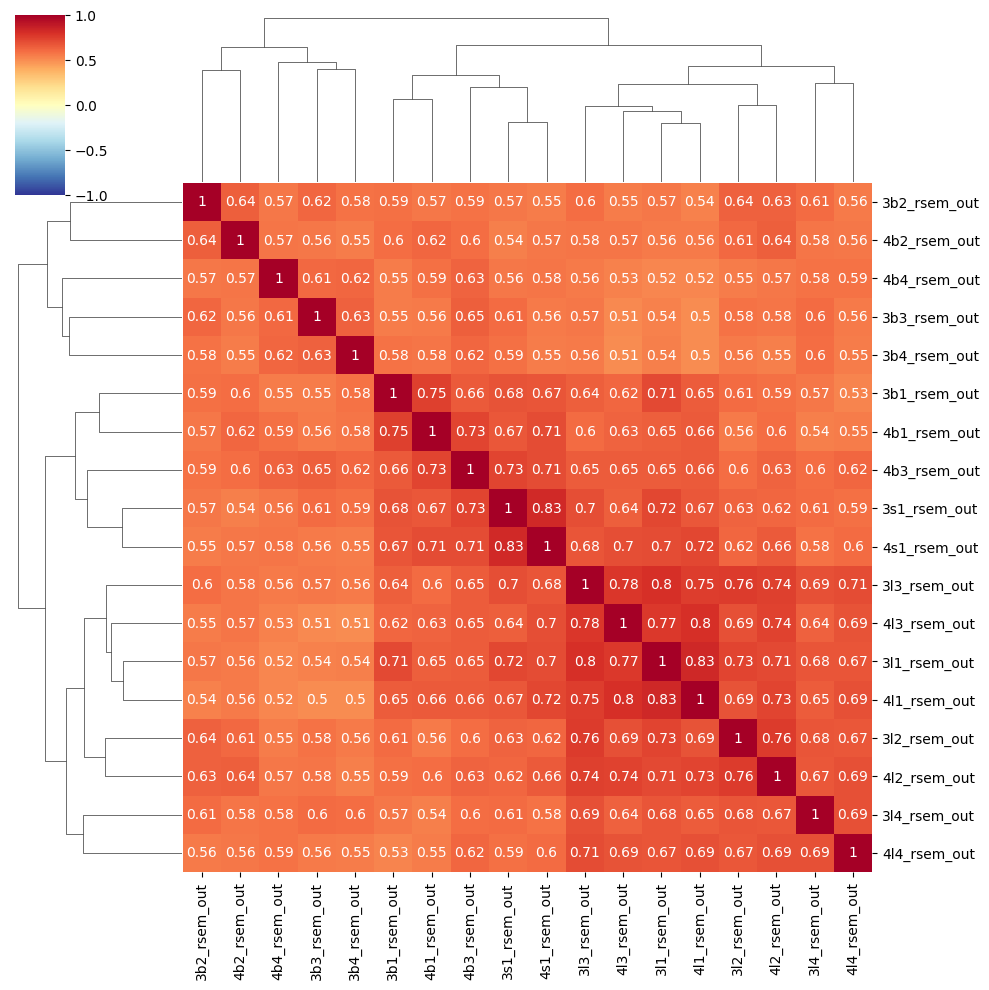

In [11]:
sns.clustermap(corr_matrix2, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [13]:
corr_matrix3 = data.corr(method='spearman')
corr_matrix3

/var/folders/6s/k1bd82wd58b1zy8ttygkfwtw0000gn/T/ipykernel_2542/3042243467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix3 = data.corr(method='spearman')


,3b1_rsem_out,3b2_rsem_out,3b3_rsem_out,3b4_rsem_out,3l1_rsem_out,3l2_rsem_out,3l3_rsem_out,3l4_rsem_out,3s1_rsem_out,4b1_rsem_out,4b2_rsem_out,4b3_rsem_out,4b4_rsem_out,4l1_rsem_out,4l2_rsem_out,4l3_rsem_out,4l4_rsem_out,4s1_rsem_out
3b1_rsem_out,1.000000,0.592448,0.547783,0.578653,0.711137,0.605879,0.644953,0.567914,0.680528,0.747465,0.596361,0.660236,0.551116,0.648454,0.592005,0.619310,0.526984,0.672160
3b2_rsem_out,0.592448,1.000000,0.622672,0.584419,0.569004,0.640501,0.595872,0.606259,0.567355,0.568316,0.643703,0.585010,0.566974,0.536217,0.633461,0.547299,0.562011,0.549575
3b3_rsem_out,0.547783,0.622672,1.000000,0.634587,0.537018,0.582791,0.569437,0.602705,0.609168,0.555988,0.564735,0.646930,0.610138,0.500234,0.575008,0.510691,0.557525,0.558319
3b4_rsem_out,0.578653,0.584419,0.634587,1.000000,0.540125,0.557426,0.560187,0.599807,0.589223,0.578069,0.552714,0.620680,0.618924,0.501832,0.546855,0.505878,0.553614,0.553398
3l1_rsem_out,0.711137,0.569004,0.537018,0.540125,1.000000,0.726836,0.803671,0.677304,0.722165,0.647042,0.555247,0.654216,0.520698,0.831783,0.712011,0.769723,0.673829,0.703876
3l2_rsem_out,0.605879,0.640501,0.582791,0.557426,0.726836,1.000000,0.760412,0.676711,0.629104,0.559428,0.612798,0.601373,0.552530,0.686815,0.760037,0.693080,0.668218,0.619296
3l3_rsem_out,0.644953,0.595872,0.569437,0.560187,0.803671,0.760412,1.000000,0.691722,0.697152,0.604230,0.577604,0.653383,0.560962,0.750395,0.744235,0.775127,0.708140,0.677482
3l4_rsem_out,0.567914,0.606259,0.602705,0.599807,0.677304,0.676711,0.691722,1.000000,0.606456,0.541783,0.577880,0.596170,0.579980,0.648769,0.670519,0.639978,0.687798,0.583627
3s1_rsem_out,0.680528,0.567355,0.609168,0.589223,0.722165,0.629104,0.697152,0.606456,1.000000,0.671293,0.539607,0.730632,0.564644,0.670059,0.622375,0.641896,0.589949,0.825042
4b1_rsem_out,0.747465,0.568316,0.555988,0.578069,0.647042,0.559428,0.604230,0.541783,0.671293,1.000000,0.619042,0.730806,0.592581,0.659388,0.600599,0.631555,0.548372,0.709656


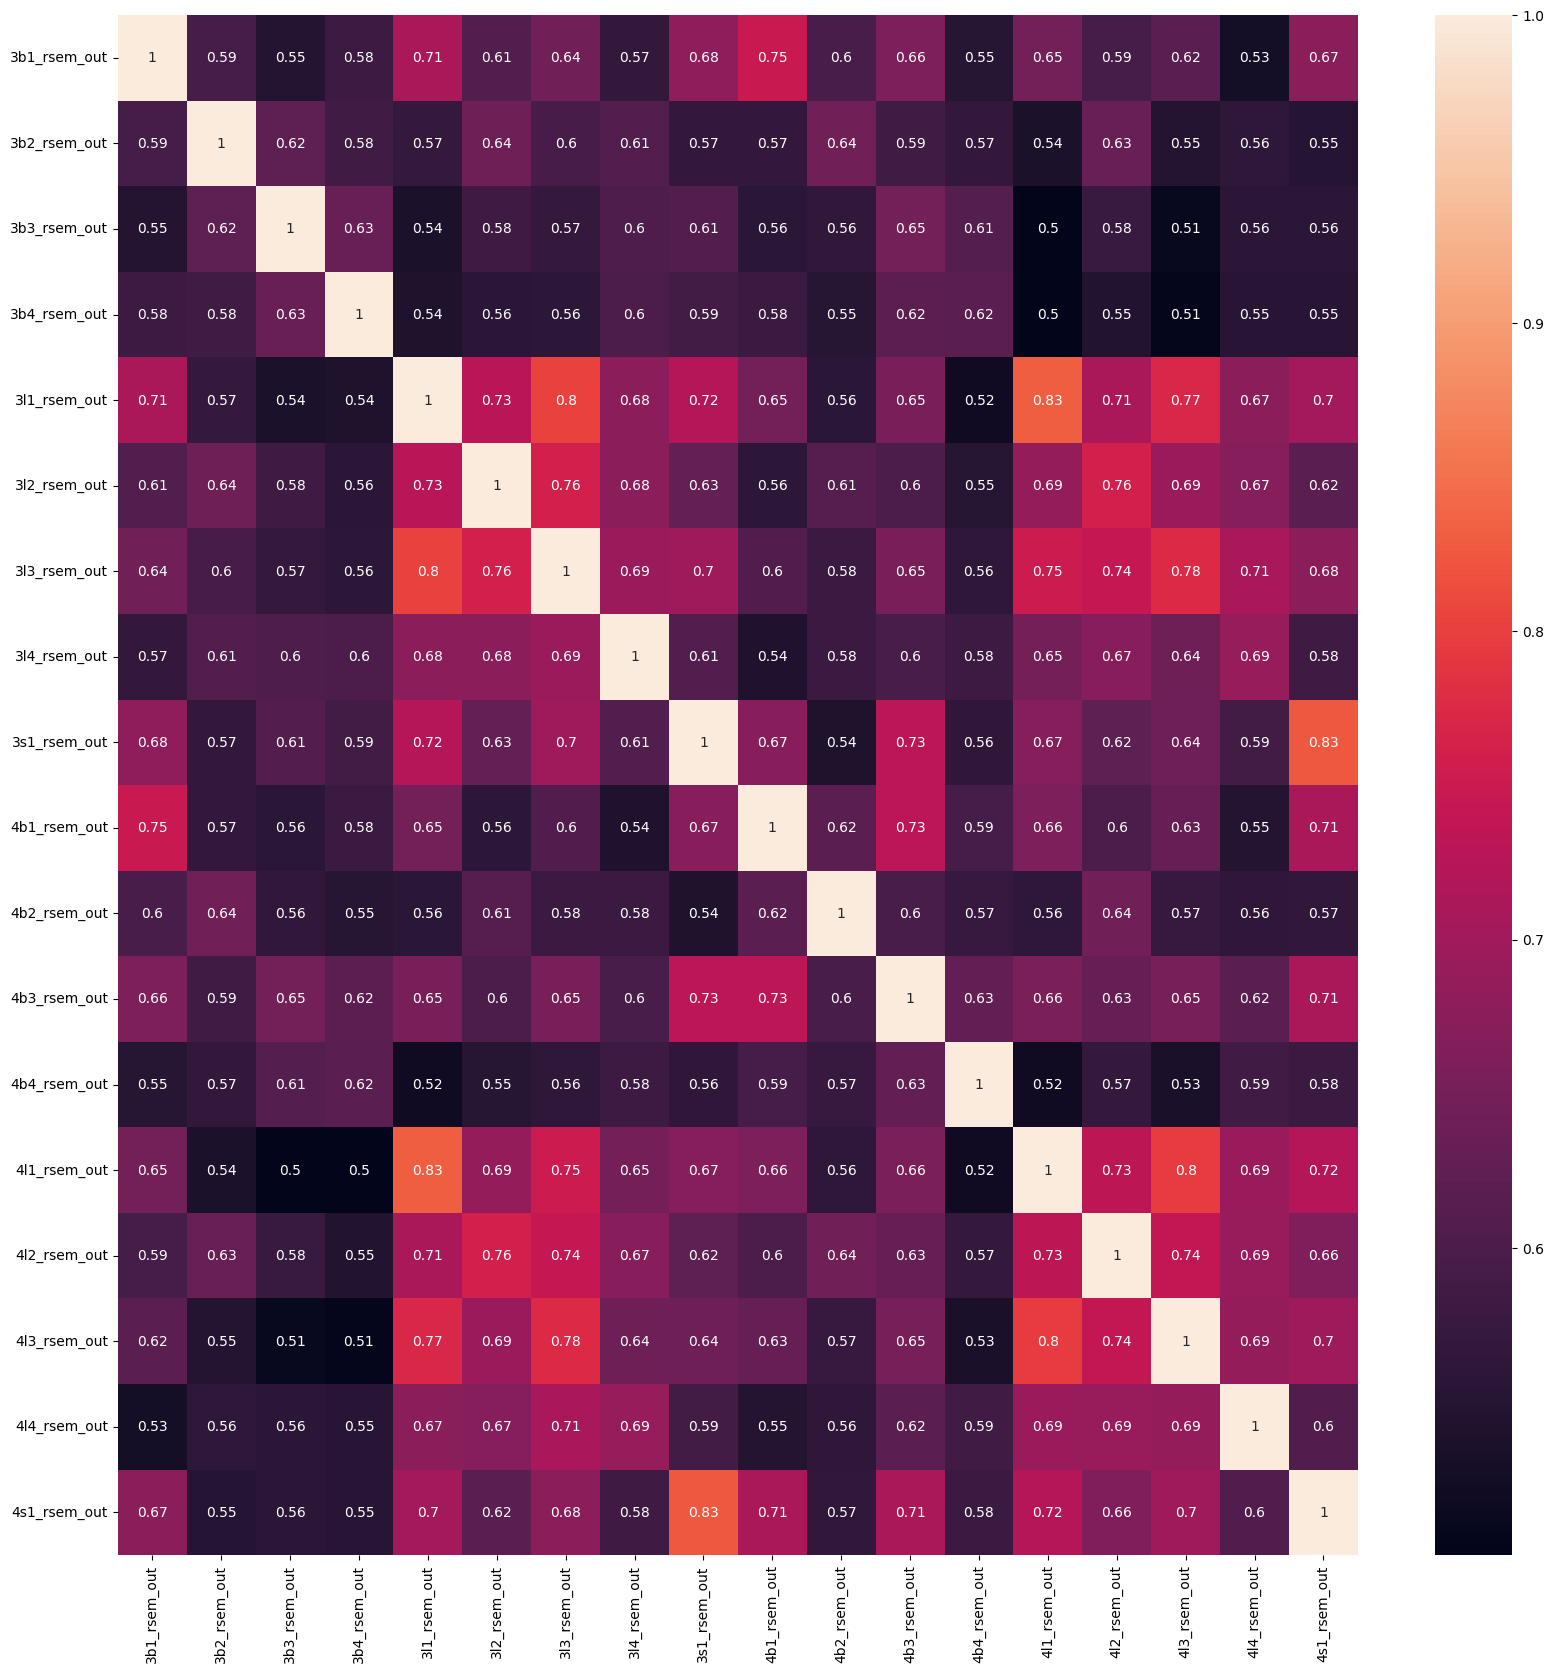

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix3, annot=True)
plt.show()